# Flight Price Prediction

Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
#Importing Liabraries amd models and metrics for analysis and model creation
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,Ridge
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Impoting file & data
df=pd.read_csv("Data_Train.csv")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [4]:
#Let's upload the data for which the price needs to be predicted
df1=pd.read_csv("Test_set.csv")
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
df1.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL ? BOM ? COK,04:55,19:15,14h 20m,1 stop,No info


# Exploratory data analysis for better understaning & cleaning the data

In [6]:
#Checking the null value-No null value found 
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

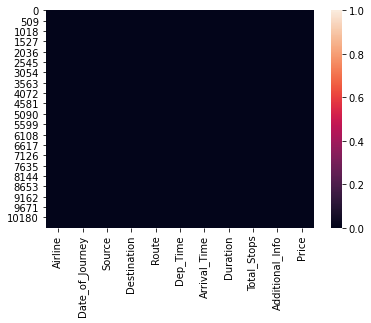

In [7]:
sns.heatmap(df.isnull())

In [8]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

<AxesSubplot:>

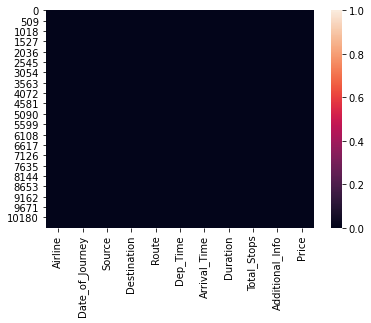

In [9]:
sns.heatmap(df.isnull())

In [10]:
#Lets check the data Types- we can see that almost all the data into object. we have to convert this into integer to further processing
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [11]:
df1.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [12]:
#Since Nan data is very very less so lest drop this so proceed further 
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:
df["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [15]:
df.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Text(0.5, 1.0, 'Number of flights with different Airlines')

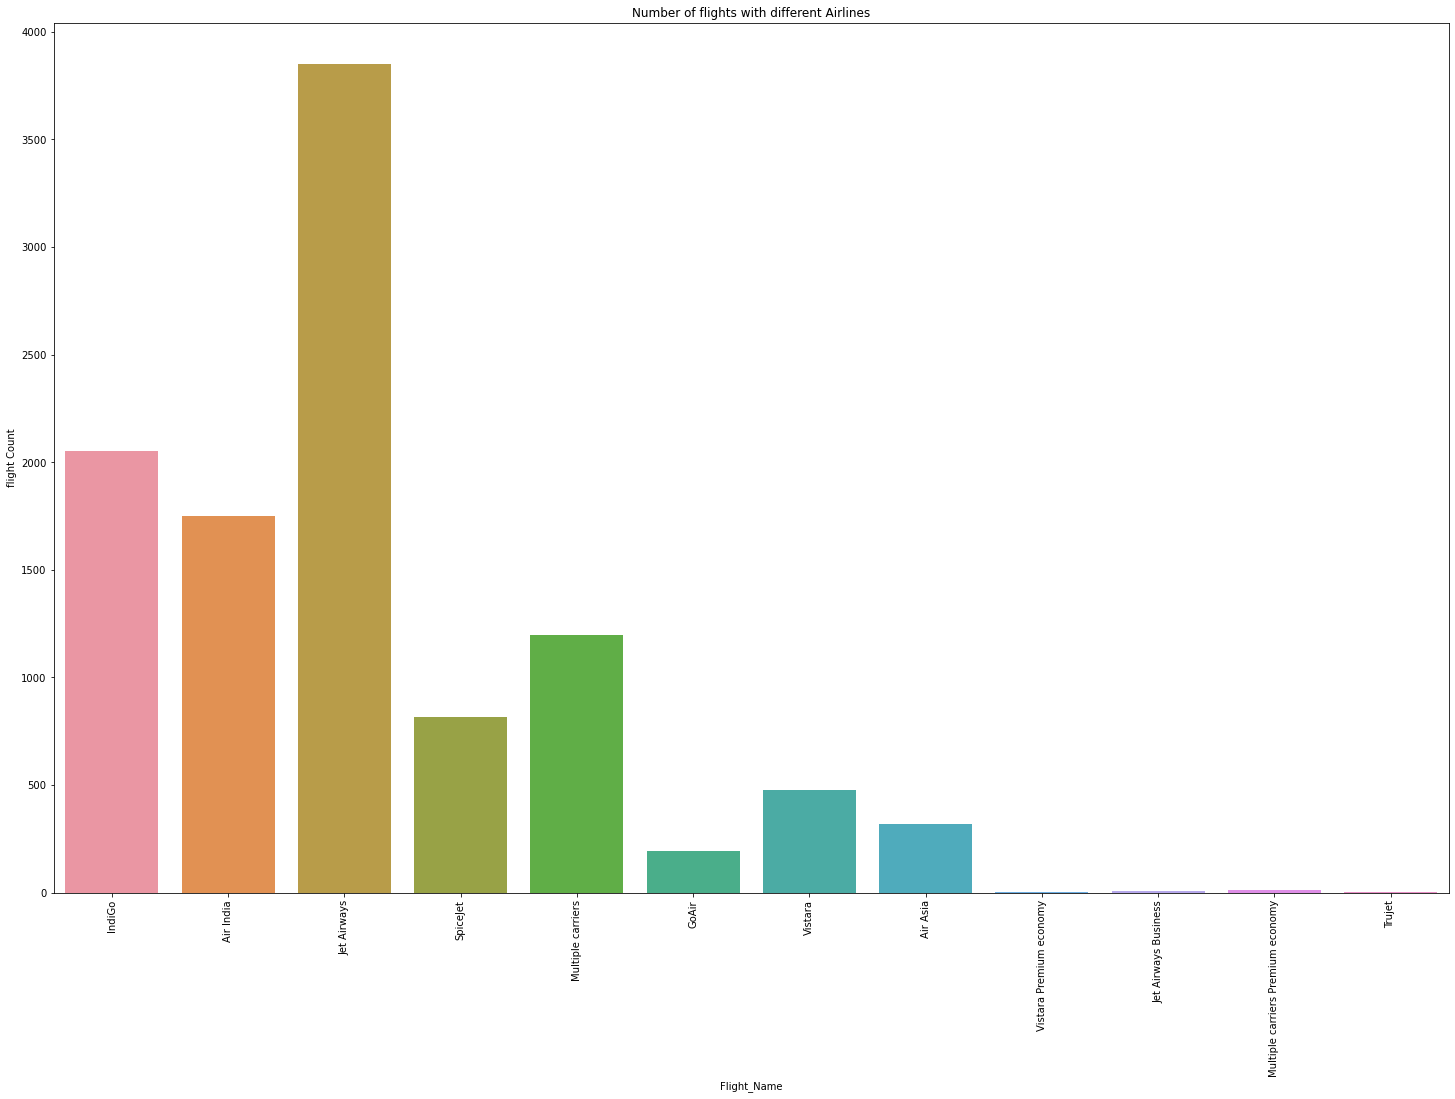

In [16]:
plt.figure(figsize=(25,16))
sns.countplot(x="Airline",data=df)
plt.xticks(rotation = 90)
plt.xlabel("Flight_Name")
plt.ylabel("flight Count")
plt.title('Number of flights with different Airlines')

We can see that the people prefers to move through the Jet airways and vista and jet airways busniss have bery low customer range

<AxesSubplot:title={'center':'Price Comparision'}, xlabel='Airline', ylabel='Price'>

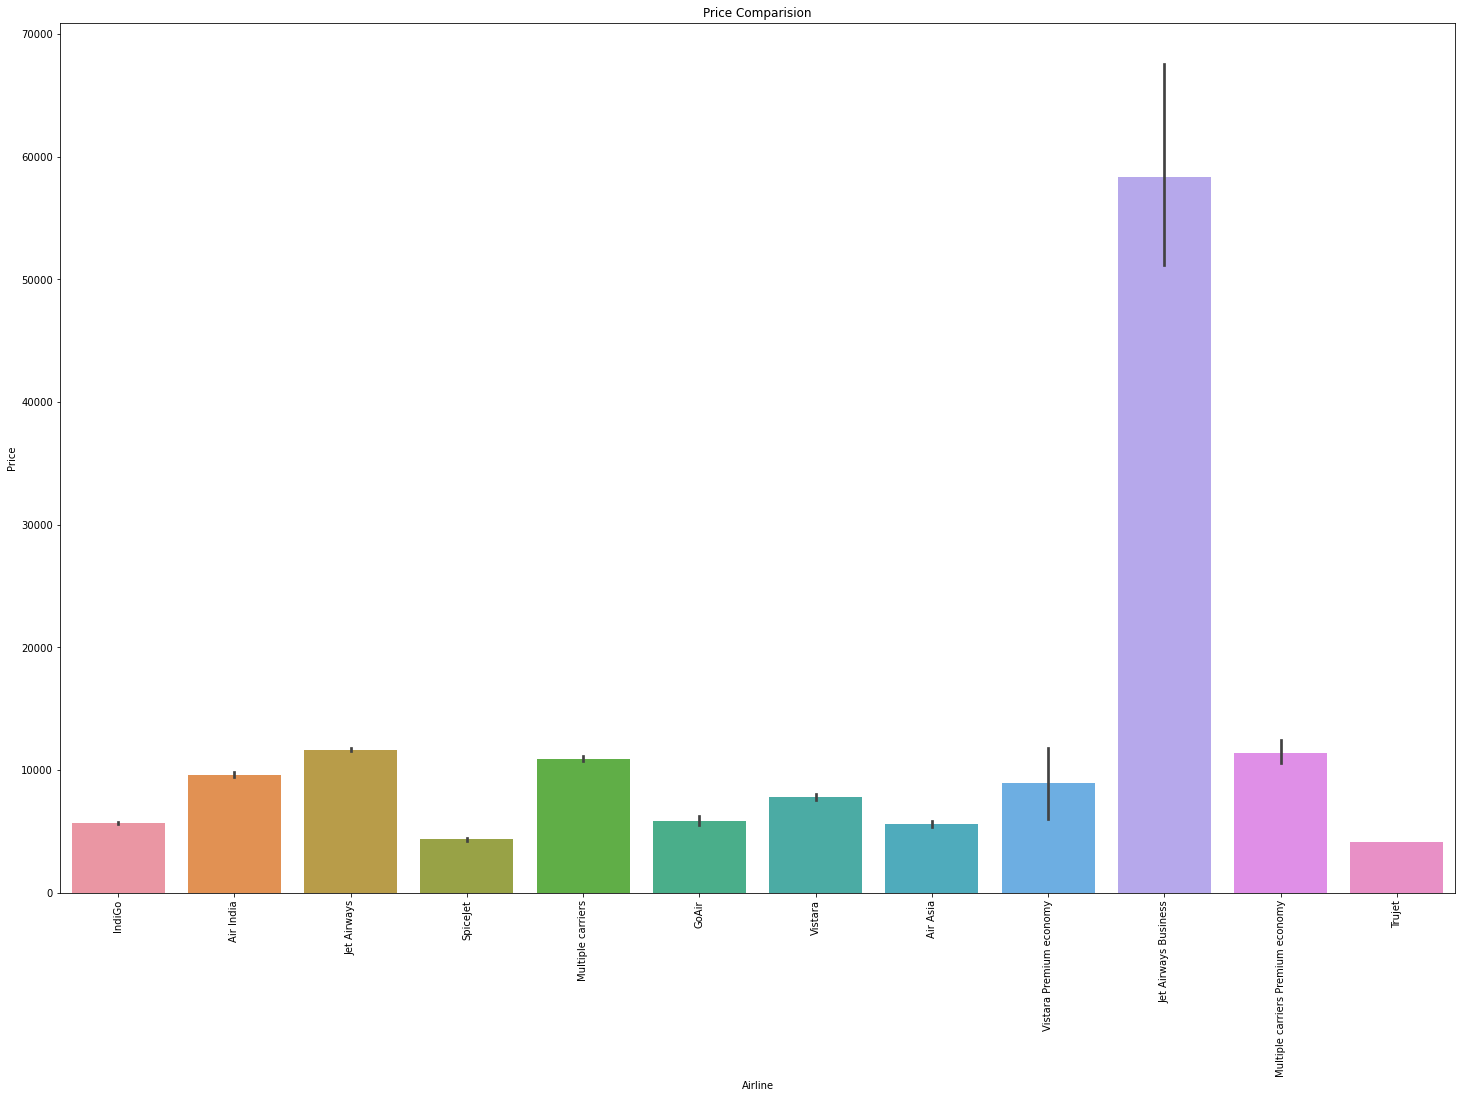

In [17]:
plt.figure(figsize=(25,16))
plt.xticks(rotation = 90)
plt.xlabel("Flight_Name")
plt.ylabel("Price")
plt.title('Price Comparision')
sns.barplot(x="Airline",y="Price",data=df)

the prices of the jet airways are very high in comparision to other flights. 

Text(0.5, 1.0, 'Number of flights booked for different destination')

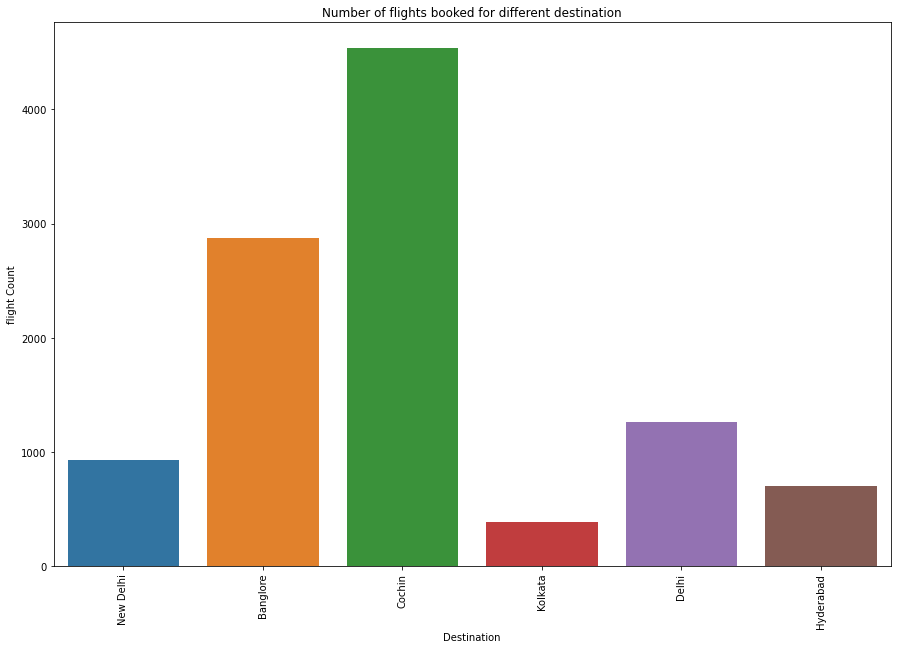

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(x="Destination",data=df)
plt.xticks(rotation = 90)
plt.xlabel("Destination")
plt.ylabel("flight Count")
plt.title('Number of flights booked for different destination')

Text(0.5, 1.0, 'Number of flights booked for different destination')

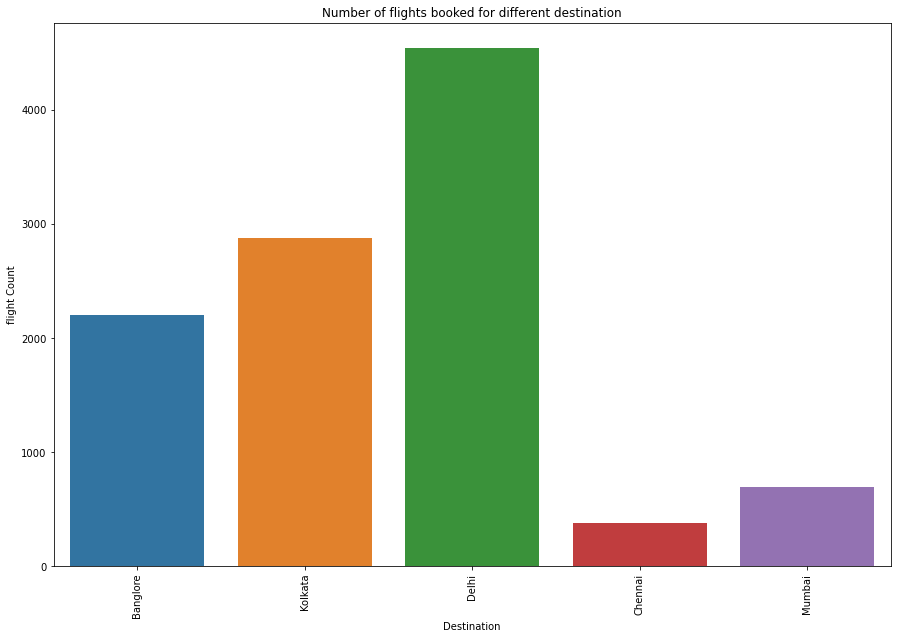

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(x="Source",data=df)
plt.xticks(rotation = 90)
plt.xlabel("Destination")
plt.ylabel("flight Count")
plt.title('Number of flights booked for different destination')

The most preferred cource and destination locations are delhi and cochin locations

Text(0.5, 1.0, 'Number of flights booked for different destination')

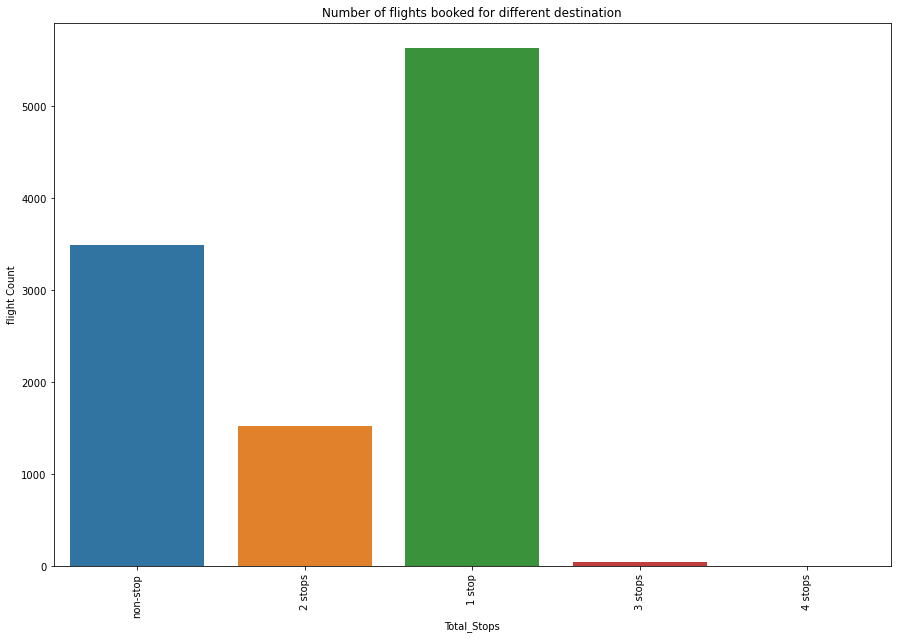

In [20]:
plt.figure(figsize=(15,10))
sns.countplot(x="Total_Stops",data=df)
plt.xticks(rotation = 90)
plt.xlabel("Total_Stops")
plt.ylabel("flight Count")
plt.title('Number of flights booked for different destination')

We can see that people prefer 1 stop flights mostly

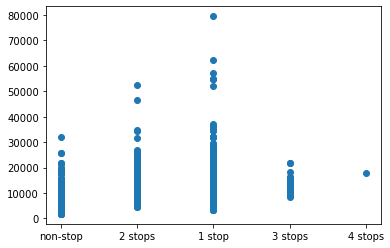

In [21]:
plt.scatter(df["Total_Stops"],df["Price"])
plt.show()

In [22]:
#Since there are two types of "No info" data. we have to get this convereted into one. 
df["Additional_Info"]=df["Additional_Info"].replace({"No Info":"No info"})

In [23]:
df["Additional_Info"].value_counts()

No info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

#Lets convert the object data into integer 

In [24]:
# Duration convert hours in min.
df['Duration']=  df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
df1['Duration']=  df1['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [25]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,285,1 stop,No info,13302


In [26]:
#Cobverting Date, Month and timings data into numeric/Integer
# Date_of_Journey
df["Journey_day"] = df['Date_of_Journey'].str.split('/').str[0].astype(int)
df["Journey_month"] = df['Date_of_Journey'].str.split('/').str[1].astype(int)
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [27]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,285,1 stop,No info,13302,1,3,16,50,21,35


In [28]:
# Date_of_Journey
df1["Journey_day"] = df1['Date_of_Journey'].str.split('/').str[0].astype(int)
df1["Journey_month"] = df1['Date_of_Journey'].str.split('/').str[1].astype(int)
df1.drop(["Date_of_Journey"], axis = 1, inplace = True)

df1["Dep_Hour"] = df1['Dep_Time'].str.split(':').str[0].astype(int)
df1["dep_Minute"] = df1['Dep_Time'].str.split(':').str[1].astype(int)
df1.drop(["Dep_Time"], axis = 1, inplace = True)

In [29]:
df1["Arrival_Hour"] = df1['Arrival_Time'].str.split(':').str[0].astype(int)

In [30]:
df1.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_Hour,dep_Minute,Arrival_Hour
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,04:25 07 Jun,655,1 stop,No info,6,6,17,30,4
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,10:20,240,1 stop,No info,12,5,6,20,10
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,19:00 22 May,1425,1 stop,In-flight meal not included,21,5,19,15,19
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,21:00,780,1 stop,No info,21,5,8,0,21
4,Air Asia,Banglore,Delhi,BLR ? DEL,02:45 25 Jun,170,non-stop,No info,24,6,23,55,2


In [31]:
df1.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Journey_day        0
Journey_month      0
Dep_Hour           0
dep_Minute         0
Arrival_Hour       0
dtype: int64

In [32]:
df1["Arrival_Minute"] = df1['Arrival_Time'].str.split(':').str[1].astype(str)

In [33]:
df1.drop(["Arrival_Time"], axis = 1, inplace = True)

In [34]:
df1

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_Hour,dep_Minute,Arrival_Hour,Arrival_Minute
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,655,1 stop,No info,6,6,17,30,4,25 07 Jun
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,240,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,1425,1 stop,In-flight meal not included,21,5,19,15,19,00 22 May
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,780,1 stop,No info,21,5,8,0,21,00
4,Air Asia,Banglore,Delhi,BLR ? DEL,170,non-stop,No info,24,6,23,55,2,45 25 Jun
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU ? DEL ? BLR,1435,1 stop,No info,6,6,20,30,20,25 07 Jun
2667,IndiGo,Kolkata,Banglore,CCU ? BLR,155,non-stop,No info,27,3,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,395,1 stop,No info,6,3,21,50,4,25 07 Mar
2669,Air India,Delhi,Cochin,DEL ? BOM ? COK,915,1 stop,No info,6,3,4,0,19,15


In [35]:
df1["Arrival_Minute"] = df1['Arrival_Minute'].str.split(' ').str[0].astype(int)

In [36]:
df1

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_Hour,dep_Minute,Arrival_Hour,Arrival_Minute
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,655,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,240,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,1425,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,780,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,170,non-stop,No info,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU ? DEL ? BLR,1435,1 stop,No info,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU ? BLR,155,non-stop,No info,27,3,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,395,1 stop,No info,6,3,21,50,4,25
2669,Air India,Delhi,Cochin,DEL ? BOM ? COK,915,1 stop,No info,6,3,4,0,19,15


In [37]:
df1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_Hour,dep_Minute,Arrival_Hour,Arrival_Minute
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,655,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,240,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,1425,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,780,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,170,non-stop,No info,24,6,23,55,2,45


Text(0.5, 1.0, 'Number of flights in different month')

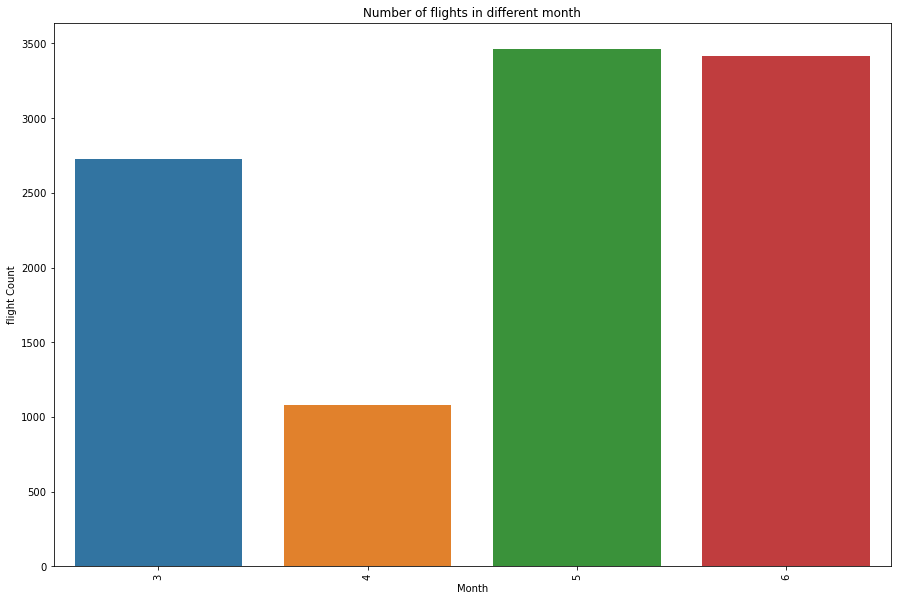

In [38]:
plt.figure(figsize=(15,10))
sns.countplot(x="Journey_month",data=df)
plt.xticks(rotation = 90)
plt.xlabel("Month")
plt.ylabel("flight Count")
plt.title('Number of flights in different month')

array([[<AxesSubplot:title={'center':'Duration'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Journey_day'}>,
        <AxesSubplot:title={'center':'Journey_month'}>],
       [<AxesSubplot:title={'center':'Dep_hour'}>,
        <AxesSubplot:title={'center':'Dep_min'}>,
        <AxesSubplot:title={'center':'Arrival_hour'}>,
        <AxesSubplot:title={'center':'Arrival_min'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

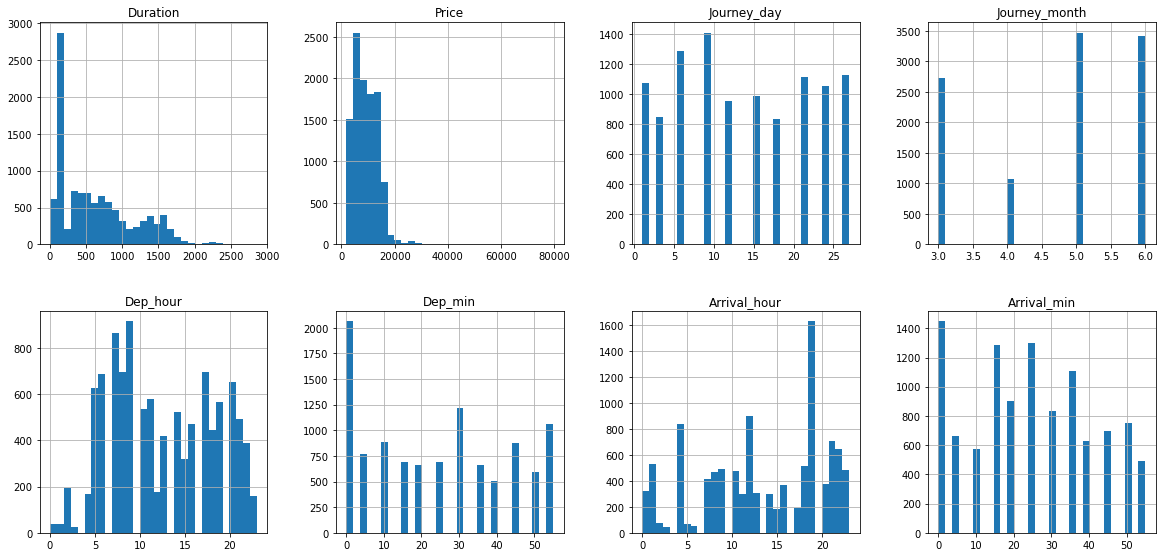

In [39]:
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Fr

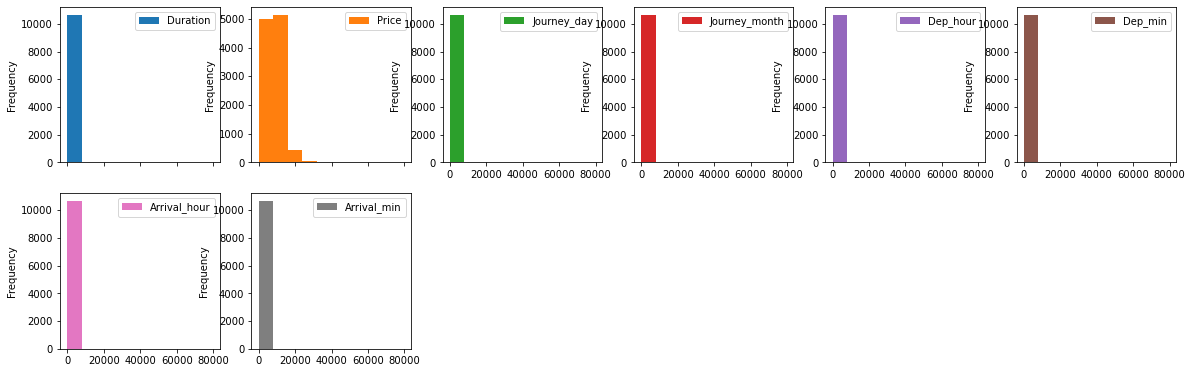

In [40]:
df.plot(kind="hist",subplots=True,layout=(6,6),figsize=(20,20))

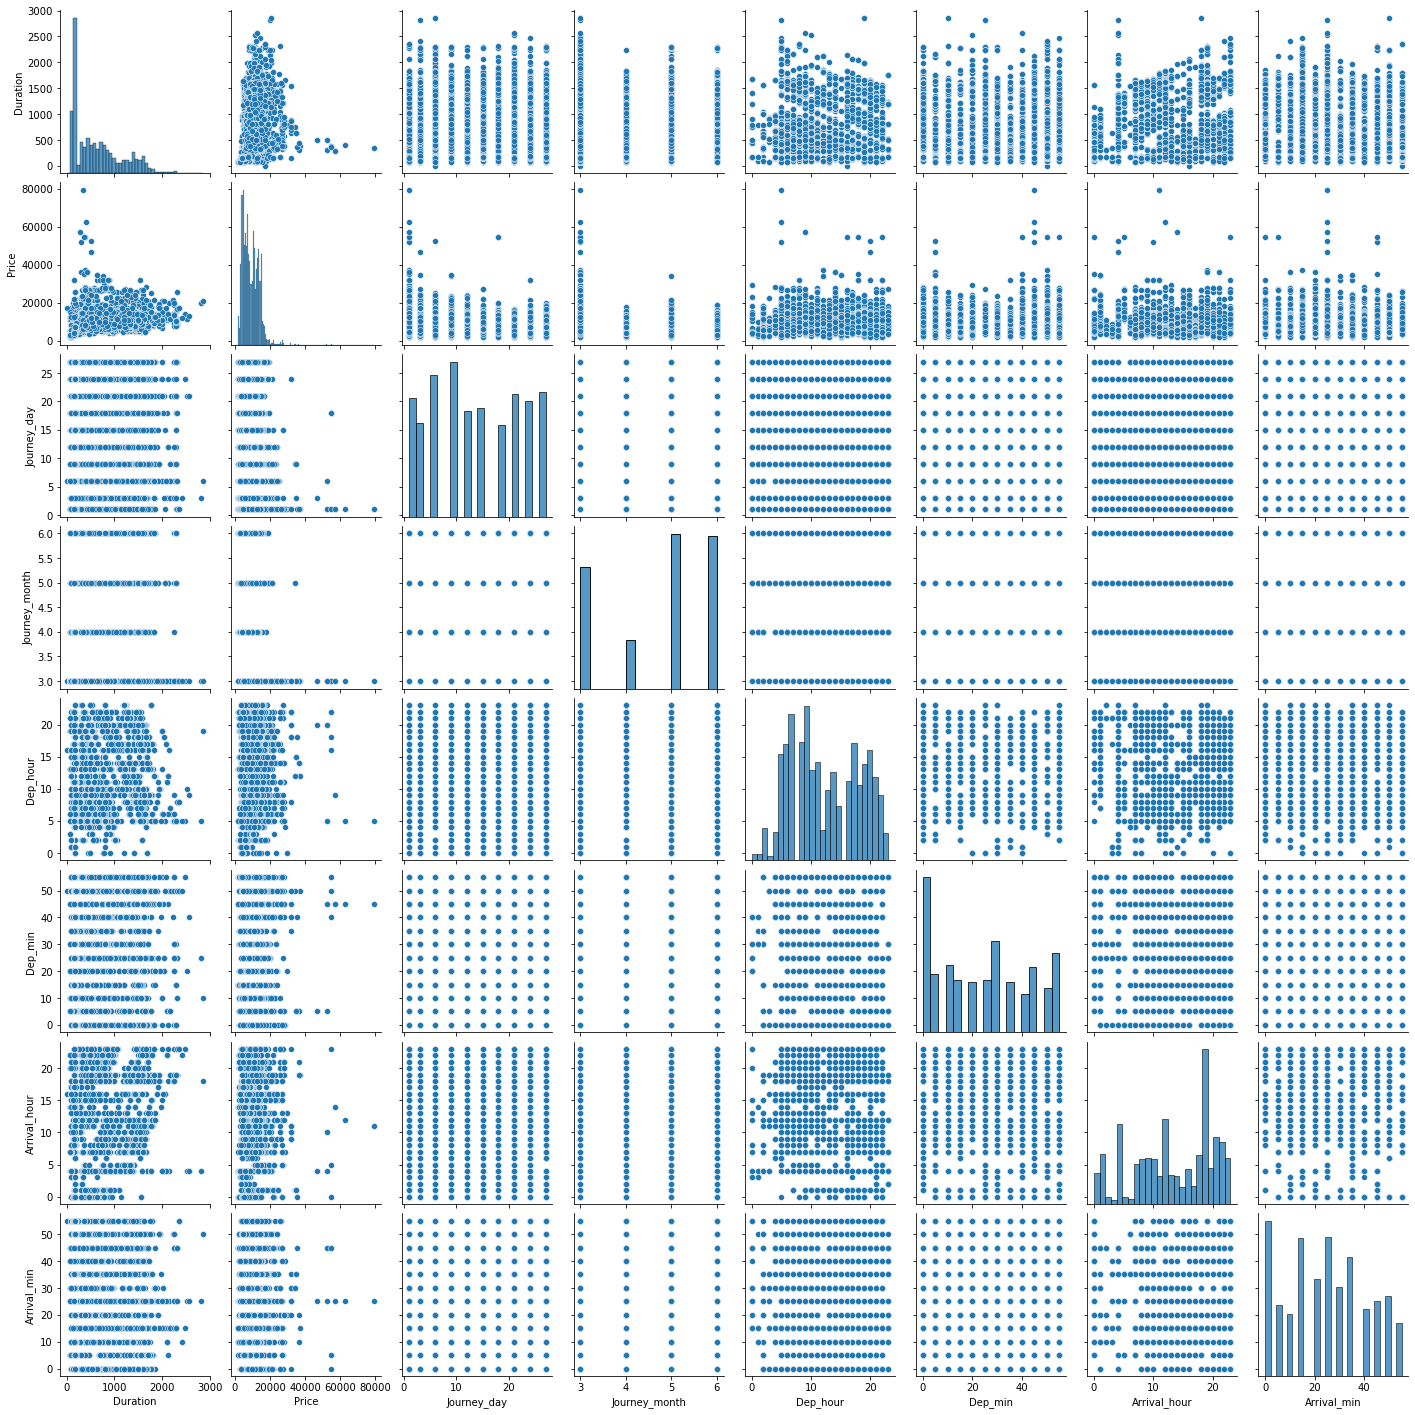

In [41]:
sns.pairplot(df)

In [42]:
#Coverting object data in float/Integer by using label Encoding  
le=LabelEncoder()
df["Airline"]=le.fit_transform(df["Airline"].astype(str))
df["Source"]=le.fit_transform(df["Source"].astype(str))
df["Destination"]=le.fit_transform(df["Destination"].astype(str))
df["Route"]=le.fit_transform(df["Route"].astype(str))
df["Total_Stops"]=le.fit_transform(df["Total_Stops"].astype(str))
df["Additional_Info"]=le.fit_transform(df["Additional_Info"].astype(str))

In [43]:
le=LabelEncoder()
df1["Airline"]=le.fit_transform(df1["Airline"].astype(str))
df1["Source"]=le.fit_transform(df1["Source"].astype(str))
df1["Destination"]=le.fit_transform(df1["Destination"].astype(str))
df1["Route"]=le.fit_transform(df1["Route"].astype(str))
df1["Total_Stops"]=le.fit_transform(df1["Total_Stops"].astype(str))
df1["Additional_Info"]=le.fit_transform(df1["Additional_Info"].astype(str))

In [44]:
df1

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_Hour,dep_Minute,Arrival_Hour,Arrival_Minute
0,4,2,1,76,655,0,5,6,6,17,30,4,25
1,3,3,0,65,240,0,5,12,5,6,20,10,20
2,4,2,1,76,1425,0,3,21,5,19,15,19,0
3,6,2,1,76,780,0,5,21,5,8,0,21,0
4,0,0,2,16,170,4,5,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,1435,0,5,6,6,20,30,20,25
2667,3,3,0,43,155,4,5,27,3,14,20,16,55
2668,4,2,1,76,395,0,5,6,3,21,50,4,25
2669,1,2,1,76,915,0,5,6,3,4,0,19,15


In [45]:
#Checking skewness. SInce the skewness is not that much we can proceed further without removing.  
df.skew()

Airline            0.731057
Source            -0.424023
Destination        1.244046
Route             -0.501911
Duration           0.861411
Total_Stops        0.631532
Additional_Info   -2.114397
Price              1.812405
Journey_day        0.118174
Journey_month     -0.387409
Dep_hour           0.112924
Dep_min            0.167234
Arrival_hour      -0.370146
Arrival_min        0.110945
dtype: float64

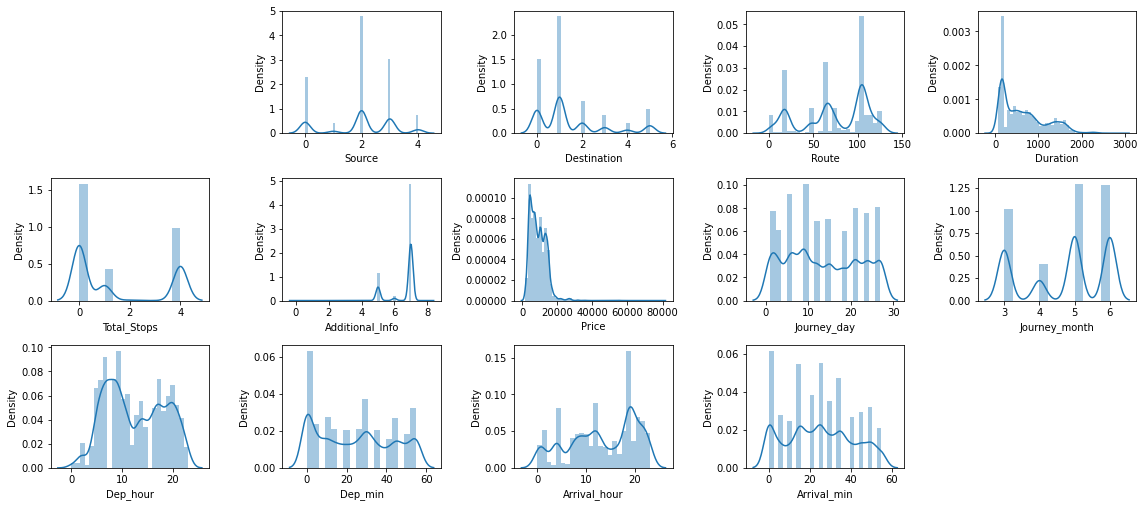

In [46]:
collist=df.columns.values
ncol=5
nrows=7
plt.figure(figsize=(16,16))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])
    plt.tight_layout()

In [47]:
df1.skew()

Airline            0.483882
Source            -0.424997
Destination        1.263630
Route             -0.281807
Duration           0.896103
Total_Stops        0.672623
Additional_Info   -1.719119
Journey_day        0.199540
Journey_month     -0.403700
Dep_Hour           0.093759
dep_Minute         0.128515
Arrival_Hour      -0.443166
Arrival_Minute     0.115267
dtype: float64

In [48]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,170,4,7,3897,24,3,22,20,1,10
1,1,3,0,84,445,1,7,7662,1,5,5,50,13,15
2,4,2,1,118,1140,1,7,13882,9,6,9,25,4,25
3,3,3,0,91,325,0,7,6218,12,5,18,5,23,30
4,3,0,5,29,285,0,7,13302,1,3,16,50,21,35


In [49]:
#Checking Correlation between the different data
df.corr()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
Airline,1.000000,-0.013397,0.018446,0.025214,-0.159651,0.035973,-0.077741,-0.039565,0.026137,0.024674,-0.035269,-0.059922,-0.007567,-0.071092
Source,-0.013397,1.000000,-0.592576,0.403412,0.161886,-0.225605,-0.015859,0.015999,0.004902,0.183268,0.059047,-0.056998,0.025635,0.021040
Destination,0.018446,-0.592576,1.000000,-0.461176,-0.257352,0.337872,0.013103,-0.071122,-0.041025,-0.364682,-0.072997,0.127931,-0.039729,0.017196
Route,0.025214,0.403412,-0.461176,1.000000,0.288773,-0.437749,0.043728,0.164149,0.081632,0.244186,-0.075002,-0.068071,0.013898,-0.173352
Duration,-0.159651,0.161886,-0.257352,0.288773,1.000000,-0.602282,-0.153066,0.506480,-0.022439,0.014836,0.002088,-0.019099,0.051531,-0.069663
Total_Stops,0.035973,-0.225605,0.337872,-0.437749,-0.602282,1.000000,0.145928,-0.571221,0.029225,-0.026328,0.039224,0.048901,-0.095650,0.175980
Additional_Info,-0.077741,-0.015859,0.013103,0.043728,-0.153066,0.145928,1.000000,-0.063753,-0.012798,-0.045466,-0.048077,-0.026082,0.031167,0.039345
Price,-0.039565,0.015999,-0.071122,0.164149,0.506480,-0.571221,-0.063753,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155
Journey_day,0.026137,0.004902,-0.041025,0.081632,-0.022439,0.029225,-0.012798,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510
Journey_month,0.024674,0.183268,-0.364682,0.244186,0.014836,-0.026328,-0.045466,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626


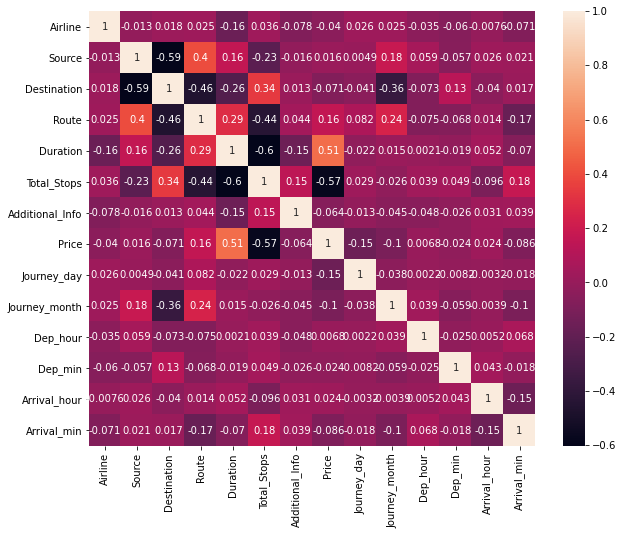

In [50]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

# We can see that the different data in the columns are not so correlated. 

In [51]:
#Checking Correlation between the different data
df1.corr()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_Hour,dep_Minute,Arrival_Hour,Arrival_Minute
Airline,1.000000,-0.031107,0.033630,0.023995,-0.182438,0.039236,-0.084423,0.000293,0.049111,0.003731,-0.047850,-0.018313,-0.097714
Source,-0.031107,1.000000,-0.578296,0.339434,0.149235,-0.212995,-0.025205,-0.032604,0.170430,0.056065,-0.064886,0.001719,-0.008304
Destination,0.033630,-0.578296,1.000000,-0.444760,-0.245068,0.331240,0.026295,-0.011200,-0.352907,-0.049023,0.153330,-0.004945,0.037196
Route,0.023995,0.339434,-0.444760,1.000000,0.275637,-0.441772,0.059682,0.046097,0.235999,-0.137575,-0.045161,0.003447,-0.213024
Duration,-0.182438,0.149235,-0.245068,0.275637,1.000000,-0.590331,-0.141044,-0.024947,-0.018051,-0.020550,0.024000,0.048261,-0.073830
Total_Stops,0.039236,-0.212995,0.331240,-0.441772,-0.590331,1.000000,0.136402,0.051912,-0.010535,0.072496,0.051715,-0.097218,0.196301
Additional_Info,-0.084423,-0.025205,0.026295,0.059682,-0.141044,0.136402,1.000000,-0.023612,-0.011683,-0.072889,0.007971,0.010917,0.034007
Journey_day,0.000293,-0.032604,-0.011200,0.046097,-0.024947,0.051912,-0.023612,1.000000,-0.023324,-0.023386,-0.010510,0.019613,-0.003485
Journey_month,0.049111,0.170430,-0.352907,0.235999,-0.018051,-0.010535,-0.011683,-0.023324,1.000000,0.015798,-0.109383,-0.000679,-0.148013
Dep_Hour,0.003731,0.056065,-0.049023,-0.137575,-0.020550,0.072496,-0.072889,-0.023386,0.015798,1.000000,-0.034524,0.000147,0.066751


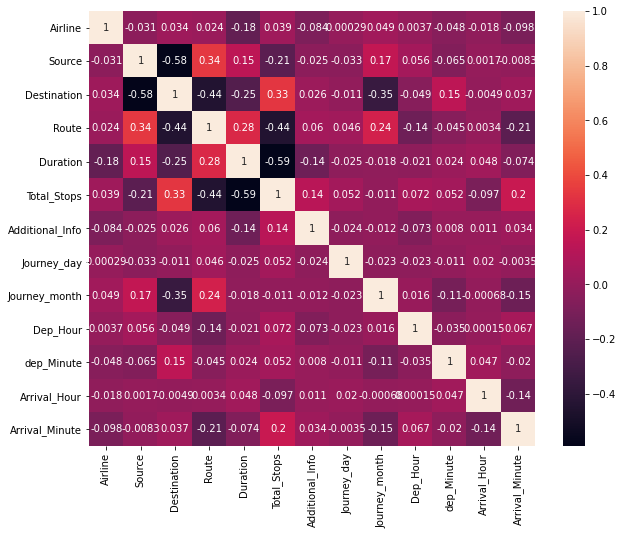

In [52]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True)
plt.show()

Airline               AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Source             AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Destination        AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Route              AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Duration           AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Total_Stops        AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Additional_Info    AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Price                    AxesSubplot(0.125,0.125;0.0945122x0.343182)
Journey_day           AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Journey_month         AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Dep_hour              AxesSubplot(0.465244,0.125;0.0945122x0.343182)
Dep_min               AxesSubplot(0.578659,0.125;0.0945122x0.343182)
Arrival_hour          AxesSubplot(0.692073,0.125;0.0945122x0.343182)
Arrival_min           AxesSubplot(0.805488,0.125;0.0945122x0.343182)
dtype: object

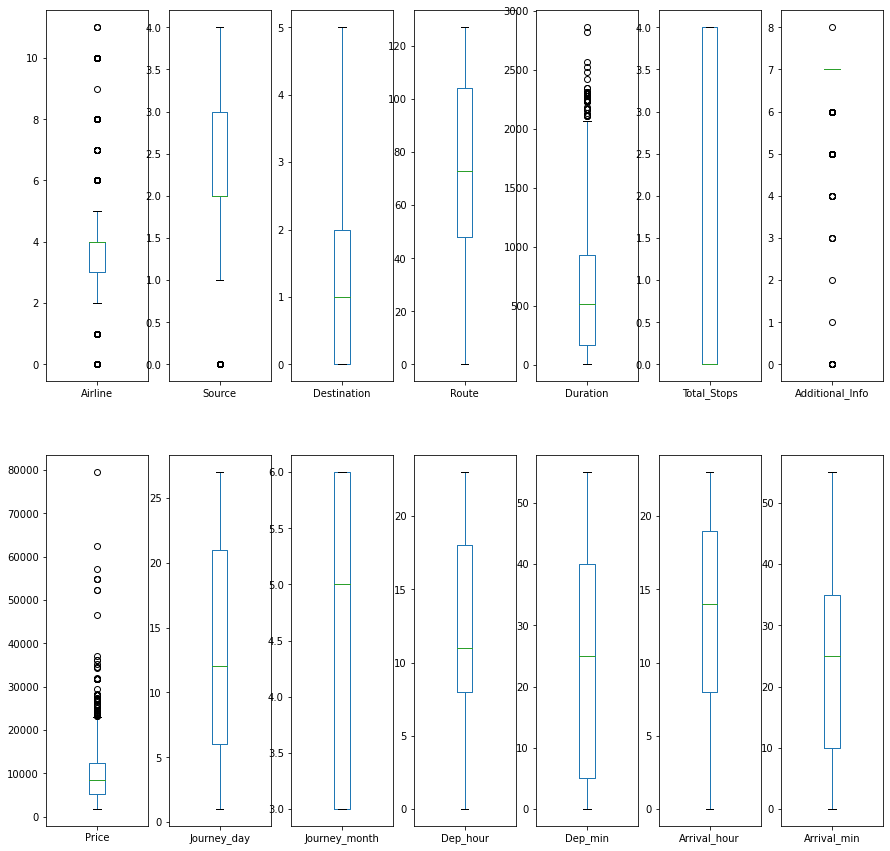

In [53]:
df.plot(kind="box",subplots=True,layout=(2,7),figsize=(15,15))

Airline               AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Source             AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Destination        AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Route              AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Duration           AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Total_Stops        AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Additional_Info    AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Journey_day              AxesSubplot(0.125,0.125;0.0945122x0.343182)
Journey_month         AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Dep_Hour              AxesSubplot(0.351829,0.125;0.0945122x0.343182)
dep_Minute            AxesSubplot(0.465244,0.125;0.0945122x0.343182)
Arrival_Hour          AxesSubplot(0.578659,0.125;0.0945122x0.343182)
Arrival_Minute        AxesSubplot(0.692073,0.125;0.0945122x0.343182)
dtype: object

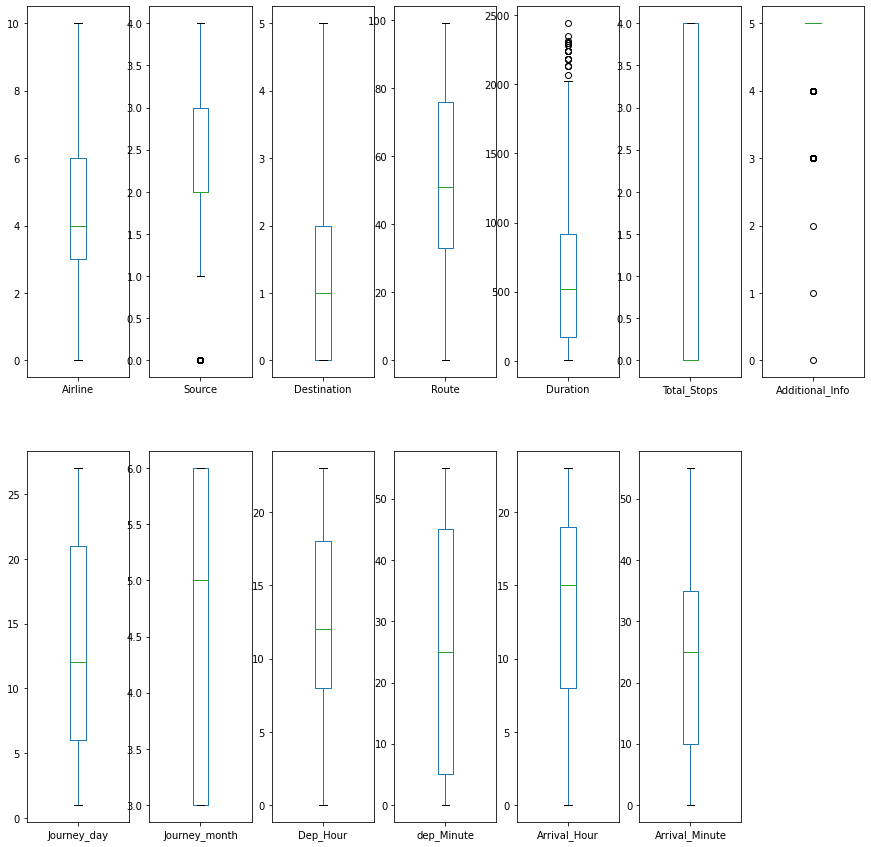

In [54]:
df1.plot(kind="box",subplots=True,layout=(2,7),figsize=(15,15))

In [55]:
#Spotting Outliers and removal
from scipy.stats import zscore
z=np.abs(zscore(df))
z
threshold=3
print(np.where(z>3))
df=df[(z<3).all(axis=1)]

(array([  123,   226,   396,   486,   510,   553,   597,   628,   657,
         785,   785,   826,   936,   946,   959,   966,   969,   975,
        1043,  1067,  1113,  1196,  1246,  1341,  1346,  1424,  1442,
        1466,  1478,  1496,  1551,  1629,  1654,  1657,  1712,  1785,
        1791,  1804,  1918,  2055,  2079,  2099,  2108,  2172,  2405,
        2481,  2495,  2495,  2553,  2556,  2556,  2618,  2635,  2641,
        2654,  2693,  2718,  2883,  2924,  2924,  3032,  3032,  3111,
        3111,  3257,  3400,  3457,  3535,  3535,  3700,  3700,  3788,
        3790,  3815,  3966,  4012,  4047,  4118,  4463,  4521,  4521,
        4655,  4676,  4829,  5013,  5013,  5136,  5372,  5372,  5439,
        5516,  5628,  5662,  5701,  5701,  5710,  5711,  5719,  5738,
        5745,  5782,  5856,  5933,  5953,  5986,  6024,  6059,  6085,
        6314,  6321,  6336,  6407,  6476,  6576,  6576,  6588,  6605,
        6884,  6991,  7189,  7232,  7306,  7329,  7351,  7356,  7377,
        7537,  7553

In [56]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z
threshold=3
print(np.where(z>3))
df1=df1[(z<3).all(axis=1)]

(array([ 251,  510,  786,  954, 1022, 1271, 1279, 1379, 1511, 1554, 1686,
       1689, 1781, 1802, 1861, 1918, 1945, 2114, 2359, 2472, 2492],
      dtype=int64), array([4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 4, 4, 4, 4, 4, 4],
      dtype=int64))


# Training and testing models

In [57]:
y=df.iloc[:,7]
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10506, dtype: int64

In [58]:
df.drop("Price",axis=1,inplace=True)

In [59]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10506, dtype: int64

In [60]:
x=df

In [61]:
x.shape

(10506, 13)

In [62]:
y.shape

(10506,)

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [64]:
x_train.shape

(7039, 13)

In [65]:
x_test.shape

(3467, 13)

In [66]:
y_train.shape,y_test.shape

((7039,), (3467,))

In [67]:
lm=LinearRegression()

In [68]:
lm.fit(x_train,y_train)

LinearRegression()

In [69]:
lm.coef_

array([ 5.24982411e+01, -2.34956834e+02,  5.40655144e+01,  9.13804872e-01,
        2.63607528e+00, -1.04363833e+03,  5.20636695e+02, -5.00186781e+01,
       -1.92653558e+02,  2.39651480e+01, -5.93809043e+00, -1.40010854e+01,
       -2.12877315e+00])

In [70]:
lm.score(x_train,y_train)

0.4842666933664552

In [71]:
pred=lm.predict(x_test)
print("predict result price",pred)
print("actual price",y_test)

predict result price [10047.98341836  9954.09681665  4852.97192331 ... 11558.87960206
 13402.05396539  5050.68103496]
actual price 33      10919
9792     7378
5085     6478
4475     4804
4700     4885
        ...  
8634     8040
3230    15603
1244     8452
5513    17024
70       5678
Name: Price, Length: 3467, dtype: int64


In [72]:
print("error:")

print("mean absolute error:",mean_absolute_error(y_test,pred))
print("men squared error:",mean_squared_error(y_test,pred))
print("root mean squared error:", np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 2340.546258177935
men squared error: 8630992.518674111
root mean squared error: 2937.8550880998387


In [73]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.4687598366177277


# REGULARIZATION

0.48426669336645267
[ 5.24982166e+01 -2.34956768e+02  5.40654865e+01  9.13804401e-01
  2.63607532e+00 -1.04363826e+03  5.20636518e+02 -5.00186767e+01
 -1.92653506e+02  2.39651403e+01 -5.93809037e+00 -1.40010813e+01
 -2.12877320e+00]


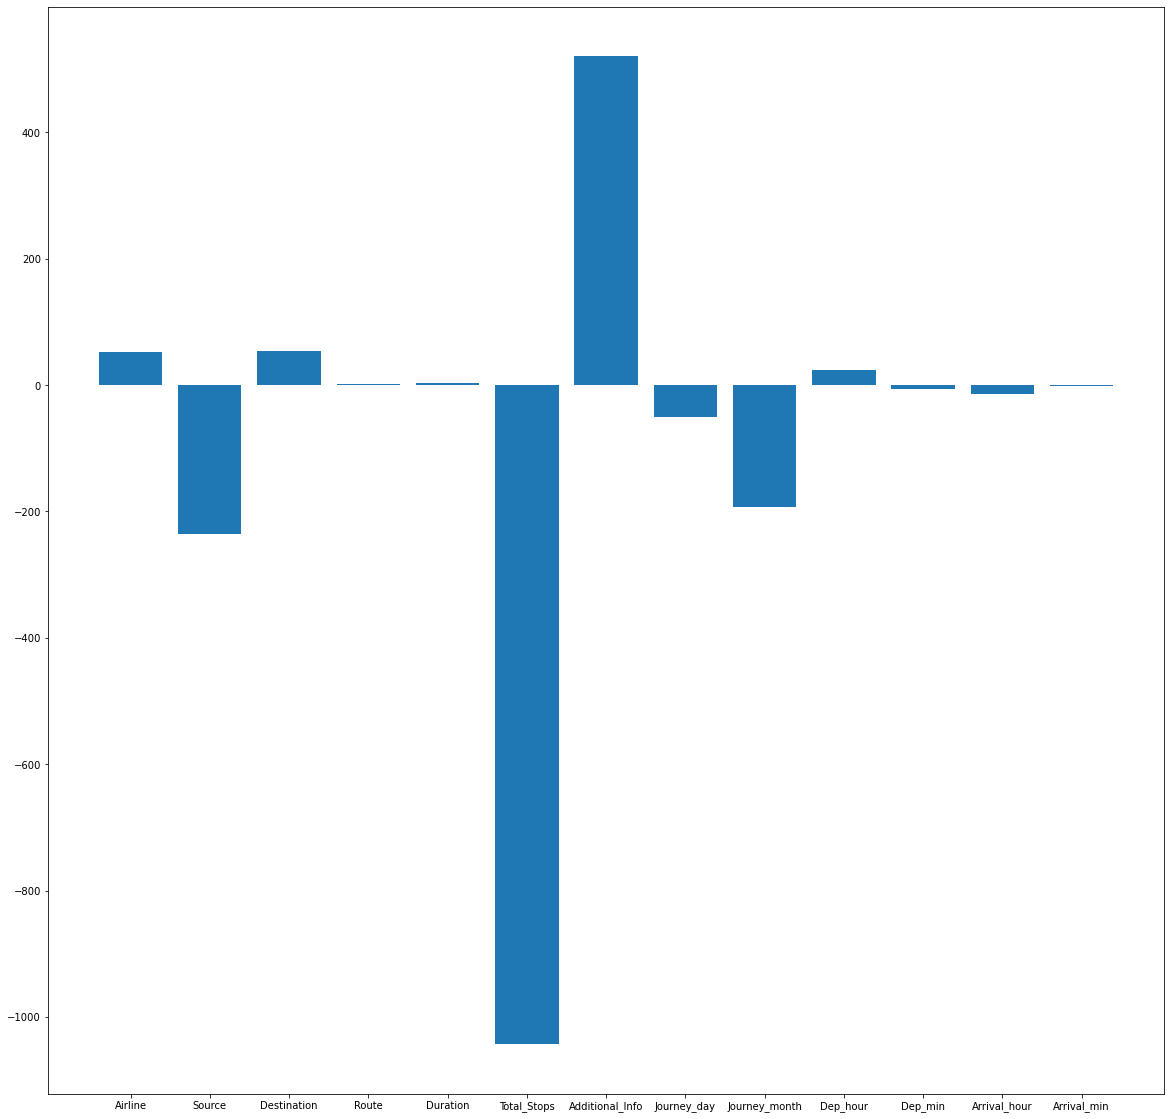

In [74]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
print(ls.coef_)
plt.figure(figsize=(20,20))
plt.bar(x.columns,ls.coef_)
plt.show()

In [75]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=.0001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.4842666931769857


array([ 5.24965447e+01, -2.34946538e+02,  5.40652522e+01,  9.14209953e-01,
        2.63612272e+00, -1.04360513e+03,  5.20588183e+02, -5.00190404e+01,
       -1.92652671e+02,  2.39642260e+01, -5.93824274e+00, -1.40002484e+01,
       -2.12898380e+00])

# Testing Thourgh different models

In [76]:
from sklearn.svm import SVR
svr=SVR(kernel="linear")
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)

In [77]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor
from sklearn.svm import SVR

In [78]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
print("DTC SCORE:",dtc.score(x_train,y_train))

dtcpredict=dtc.predict(x_test)
print("dtc r2_score:",r2_score(y_test,dtcpredict))
print("mean squared error of DTC:",mean_squared_error(y_test,dtcpredict))
print("root mean squared error of DTC:",np.sqrt(mean_squared_error(y_test,dtcpredict)))

DTC SCORE: 0.9958127083884939
dtc r2_score: 0.8737536828581153
mean squared error of DTC: 2051108.131253405
root mean squared error of DTC: 1432.1690302661223


In [79]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
print("KNR SCORE:",knr.score(x_train,y_train))

knrpredict=knr.predict(x_test)
print("knr r2_score:",r2_score(y_test,knrpredict))
print("mean squared error of KNN:",mean_squared_error(y_test,knrpredict))
print("root mean squared error of KNN:",np.sqrt(mean_squared_error(y_test,knrpredict)))

KNR SCORE: 0.7851536361360818
knr r2_score: 0.6749147889800897
mean squared error of KNN: 5281618.781194116
root mean squared error of KNN: 2298.1772736658318


In [80]:
svr1=SVR()
svr1.fit(x_train,y_train)
print("SVR1 SCORE:",svr1.score(x_train,y_train))

svr1predict=svr1.predict(x_test)
print("SVR r2_score:",r2_score(y_test,svr1predict))
print("mean squared error of SVR:",mean_squared_error(y_test,svr1predict))
print("root mean squared error of SVR:",np.sqrt(mean_squared_error(y_test,svr1predict)))

SVR1 SCORE: 0.19225393703208526
SVR r2_score: 0.20297942511397515
mean squared error of SVR: 12949093.636432266
root mean squared error of SVR: 3598.484908462486


In [81]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=42) # default(n_estimators=100) for RandomForestClassifier
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(predrf)
print("rf score:",rf.score(x_train,y_train))
print("rf r2 score:",r2_score(y_test,predrf))

[10902.47   6489.09   6873.71  ...  8522.74  17004.775  7892.12 ]
rf score: 0.9858373726889507
rf r2 score: 0.9229978861849759


In [82]:
from sklearn.ensemble import AdaBoostRegressor
#AdaBoostRegressor(base_estimator=DecisionTreeClassifier(),n_estimators=50,Learning_rate=1.0)
ad=AdaBoostRegressor(n_estimators=50,random_state=42)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(predad)
print("rf score:",rf.score(x_train,y_train))
print("rf r2 score:",r2_score(y_test,predad))

[12825.79943503 10853.35233161  6285.83362218 ... 11278.38014784
 15666.55900439  7146.46511628]
rf score: 0.9858373726889507
rf r2 score: 0.5701052342087488


In [83]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print(predgb)
print("rf score:",rf.score(x_train,y_train))
print("rf r2 score:",r2_score(y_test,predgb))

[11082.39122773  8235.49654582  5836.31608611 ...  9095.75423926
 16663.91014328  6892.77096734]
rf score: 0.9858373726889507
rf r2 score: 0.8454618247052644


We can see that the Decision Tree Regressor is providing the best result with the best r2 score so we re proceeding with the same for the further predictions 

In [84]:
df1.shape

(2650, 13)

In [85]:
dtc.predict(df1)

array([ 7757.,  4226., 11150., ..., 16022.,  8327.,  9134.])

In [86]:
pred=dtc.predict(x_test)
print("predict result price",pred)
print("actual price",y_test)

predict result price [10919.  7682.  7229. ...  7927. 17024.  8040.]
actual price 33      10919
9792     7378
5085     6478
4475     4804
4700     4885
        ...  
8634     8040
3230    15603
1244     8452
5513    17024
70       5678
Name: Price, Length: 3467, dtype: int64


In [87]:
df6=pd.read_csv("Sample_submission.csv")
df6

,Price
0,15998
1,16612
2,25572
3,25778
4,16934
...,...
2666,14046
2667,14086
2668,22720
2669,23544


In [88]:
pred=dtc.predict(df1)
print("predict result price",pred)
print("actual price",df6)

predict result price [ 7757.  4226. 11150. ... 16022.  8327.  9134.]
actual price       Price
0     15998
1     16612
2     25572
3     25778
4     16934
...     ...
2666  14046
2667  14086
2668  22720
2669  23544
2670  27489

[2671 rows x 1 columns]


In [89]:
import pickle
filename='flightpricePrediction.pkl'
pickle.dump(dtc,open(filename,'wb'))
loaded_model=pickle.load(open(filename,"rb"))
loaded_model.predict(x_test)

array([10919.,  7682.,  7229., ...,  7927., 17024.,  8040.])